<a href="https://colab.research.google.com/github/NadarMirudhula/ML-House-Price-Prediction-System/blob/main/ML_Gradient_Boost_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data.csv')
dataset

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,3.130000e+05,3,1.50,1340,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2.384000e+06,5,2.50,3650,2.0,0,4,5,3370,280,1921,0,Seattle
2,3.420000e+05,3,2.00,1930,1.0,0,0,4,1930,0,1966,0,Kent
3,4.200000e+05,3,2.25,2000,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,5.500000e+05,4,2.50,1940,1.0,0,0,4,1140,800,1976,1992,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1.75,1510,1.0,0,0,4,1510,0,1954,1979,Seattle
4596,5.343333e+05,3,2.50,1460,2.0,0,0,3,1460,0,1983,2009,Bellevue
4597,4.169042e+05,3,2.50,3010,2.0,0,0,3,3010,0,2009,0,Renton
4598,2.034000e+05,4,2.00,2090,1.0,0,0,3,1070,1020,1974,0,Seattle


In [3]:
dic = {'Shoreline':1, 'Seattle':2, 'Kent':3, 'Bellevue':4, 'Redmond':5,
       'Maple Valley':6, 'North Bend':7, 'Lake Forest Park':8, 'Sammamish':9,
       'Auburn':10, 'Des Moines':11, 'Bothell':12, 'Federal Way':13, 'Kirkland':14,
       'Issaquah':15, 'Woodinville':16, 'Normandy Park':17, 'Fall City':18, 'Renton':19,
       'Carnation':20, 'Snoqualmie':21, 'Duvall':22, 'Burien':23, 'Covington':24,
       'Inglewood-Finn Hill':25, 'Kenmore':26, 'Newcastle':27, 'Mercer Island':28,
       'Black Diamond':29, 'Ravensdale':30, 'Clyde Hill':31, 'Algona':32, 'Skykomish':33,
       'Tukwila':34, 'Vashon':35, 'Yarrow Point':36, 'SeaTac':37, 'Medina':38,
       'Enumclaw':39, 'Snoqualmie Pass':40, 'Pacific':41, 'Beaux Arts Village':42,
       'Preston':43, 'Milton':44}

In [4]:
dataset.city = [dic[item] for item in dataset.city]
dataset

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,3.130000e+05,3,1.50,1340,1.5,0,0,3,1340,0,1955,2005,1
1,2.384000e+06,5,2.50,3650,2.0,0,4,5,3370,280,1921,0,2
2,3.420000e+05,3,2.00,1930,1.0,0,0,4,1930,0,1966,0,3
3,4.200000e+05,3,2.25,2000,1.0,0,0,4,1000,1000,1963,0,4
4,5.500000e+05,4,2.50,1940,1.0,0,0,4,1140,800,1976,1992,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1.75,1510,1.0,0,0,4,1510,0,1954,1979,2
4596,5.343333e+05,3,2.50,1460,2.0,0,0,3,1460,0,1983,2009,4
4597,4.169042e+05,3,2.50,3010,2.0,0,0,3,3010,0,2009,0,19
4598,2.034000e+05,4,2.00,2090,1.0,0,0,3,1070,1020,1974,0,2


In [5]:
X = dataset.iloc[:, 1:13]

In [6]:
Y = dataset.iloc[:, 0]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 46) 

In [8]:
reg = GradientBoostingRegressor(random_state=46)

In [9]:
reg.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=46, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
y_pred = reg.predict(X_test)

In [11]:
reg.score(X_test, y_test)

0.5394809788928407

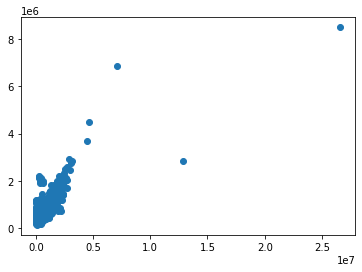

In [12]:
plt.scatter(y_train, reg.predict(X_train))

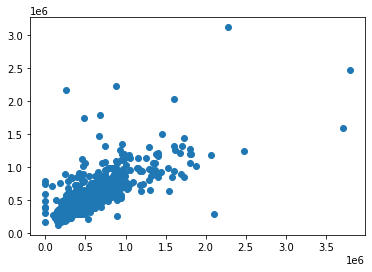

In [13]:
plt.scatter(y_test, y_pred)

In [14]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head(10)

,Actual,Predicted
1252,200000.0,239637.723194
2315,700000.0,666431.369957
3500,451000.0,582881.620309
2047,589500.0,510239.541606
3356,594000.0,430605.598319
846,379950.0,422149.783467
2379,585000.0,458556.072095
2040,1370000.0,950366.710320
509,201000.0,402683.510033
2358,784000.0,737173.378386


In [15]:
df.reset_index(drop=True, inplace=True)
df.head(10)

,Actual,Predicted
0,200000.0,239637.723194
1,700000.0,666431.369957
2,451000.0,582881.620309
3,589500.0,510239.541606
4,594000.0,430605.598319
5,379950.0,422149.783467
6,585000.0,458556.072095
7,1370000.0,950366.710320
8,201000.0,402683.510033
9,784000.0,737173.378386


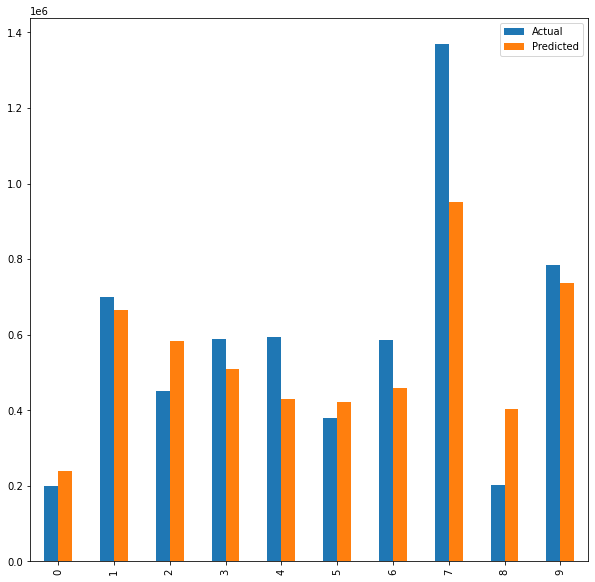

In [16]:
df.head(10).plot(kind='bar',figsize=(10,10))
plt.show()